Status: Jeg kom ikke så langt. 

## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  
## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

url = 'https://api.statbank.dk/v1/tables'
dst = pd.read_json(url)
dst.to_csv('dk-stat-all-tables.csv', encoding='utf-8', index=False)
#dst[:20]

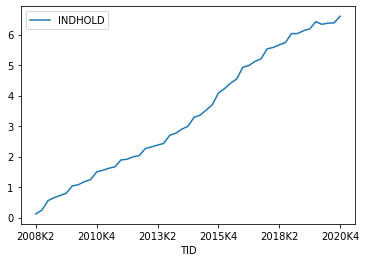

In [3]:
file = 'FOLK1A.csv'
data = pd.read_csv(file, sep =';')


for element in range(1, len(data['INDHOLD'])):
    data.loc[element,'INDHOLD'] = ((float(data['INDHOLD'][element]) / float(data['INDHOLD'][0])-1)*100)
    
data = data[:][1:]
data.plot(x="TID", y="INDHOLD")

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


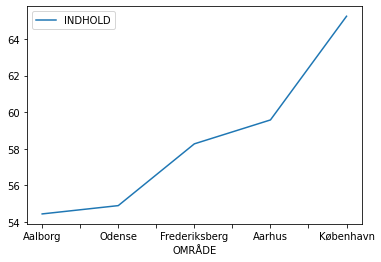

In [4]:
#B Which of the 5 biggest cities has the highest percentage of 'Never Married'?

files = 'FOLK1A-1.csv'
civil = pd.read_csv(files, sep = ';')
civil

alle_civil = civil[civil['CIVILSTAND'] == 'I alt']
alle_civil

ugift_civil = civil[civil['CIVILSTAND'] == 'Ugift']
ugift_civil

civil_list = alle_civil

for element in range(len(civil_list['INDHOLD'])):
    civil_list.loc[element,'INDHOLD'] = (float(ugift_civil['INDHOLD'][element+len(alle_civil)]) / (float(alle_civil['INDHOLD'][element]))*100)
    
civil_list = civil_list[-civil_list['OMRÅDE'].apply(lambda x: (x == 'Hele landet'))]
civil_list = civil_list[-civil_list['OMRÅDE'].apply(lambda x: (x[0:6] == 'Region'))]
civil_list = civil_list.sort_values(by='INDHOLD')   
civil_list = civil_list[-6:][1:]
civil_list.plot(x="OMRÅDE", y="INDHOLD")



,OMRÅDE,TID,CIVILSTAND,INDHOLD
0,København,2008K1,I alt,509861
1,København,2008K1,Ugift,309661
2,København,2008K1,Gift/separeret,128556
3,København,2008K1,Enke/enkemand,21555
4,København,2008K1,Fraskilt,50089
...,...,...,...,...
240,København,2020K1,I alt,632340
241,København,2020K1,Ugift,412512
242,København,2020K1,Gift/separeret,150458
243,København,2020K1,Enke/enkemand,14630


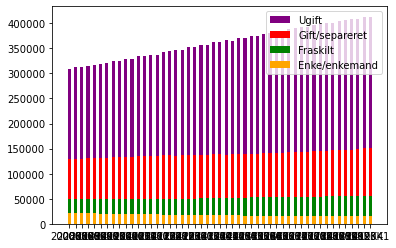

In [6]:
import pandas as pd
#C. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

file = 'FOLK1A-2.csv';
people = pd.read_csv(file, sep = ';')
people

ugift_people = people[people['CIVILSTAND'] == 'Ugift']
gift_people = people[people['CIVILSTAND'] == 'Gift/separeret']
enke_people = people[people['CIVILSTAND'] == 'Enke/enkemand']
fraskilt_people = people[people['CIVILSTAND'] == 'Fraskilt']



p1 = plt.bar(ugift_people['TID'], ugift_people['INDHOLD'], width=0.5, align='center' , color='purple')
p2 = plt.bar(gift_people['TID'], gift_people['INDHOLD'], width=0.5, align='center' , color='red')
p3 = plt.bar(fraskilt_people['TID'], fraskilt_people['INDHOLD'], width=0.5, align='center' , color='green')
p4 = plt.bar(enke_people['TID'], enke_people['INDHOLD'], width=0.5, align='center' , color='')
plt.legend([p1,p2,p3,p4],['Ugift','Gift/separeret','Fraskilt','Enke/enkemand'],loc=1)

people